In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
df = pd.read_excel("Online Retail.xlsx",parse_dates=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 1. Read and write a summary of the meta data .

<h4>Meta Data-</h4>
<p>This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.</p>
<p><i>InvoiceNo</i>: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.<br>
<i>StockCode</i>: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.<br>
<i>Description</i>: Product (item) name. Nominal.<br>
<i>Quantity</i>: The quantities of each product (item) per transaction. Numeric.<br>
<i>InvoiceDate</i>: Invice Date and time. Numeric, the day and time when each transaction was generated.<br>
<i>UnitPrice</i>: Unit price. Numeric, Product price per unit in sterling.<br>
<i>CustomerID</i>: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.<br>
<i>Country</i>: Country name. Nominal, the name of the country where each customer resides.<br>
</p>



### 2. Select only the transactions that have occurred from 01/04/ 2011 and 09/12/2011 and create a dataset.

In [67]:
df = df[(df["InvoiceDate"]>= "2011-04-01") & (df["InvoiceDate"]<="2011-12-09")]
df = df.dropna()


In [68]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...,...
540272,581474,21253,SET OF PICTURE FRAME STICKERS,1,2011-12-08 20:01:00,0.79,12748.0,United Kingdom
540273,581474,22108,PING! MICROWAVE PLATE,1,2011-12-08 20:01:00,1.25,12748.0,United Kingdom
540274,581474,22167,OVAL WALL MIRROR DIAMANTE,1,2011-12-08 20:01:00,9.95,12748.0,United Kingdom
540275,581474,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2011-12-08 20:01:00,2.08,12748.0,United Kingdom


In [69]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,302779.000000,302779.000000,302779.000000
mean,12.556161,3.097356,15293.260031
std,41.629437,24.753080,1704.179387
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13979.000000
50%,6.000000,1.690000,15152.000000
75%,12.000000,3.750000,16779.000000
max,4800.000000,8142.750000,18287.000000


### 3. Calculate the RFM values for each customer (by customer id).

In [70]:
df["Monetary"] = df["Quantity"]*df["UnitPrice"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,16.50
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,19.80
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom,10.20
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom,19.90
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom,15.30
...,...,...,...,...,...,...,...,...,...
540272,581474,21253,SET OF PICTURE FRAME STICKERS,1,2011-12-08 20:01:00,0.79,12748.0,United Kingdom,0.79
540273,581474,22108,PING! MICROWAVE PLATE,1,2011-12-08 20:01:00,1.25,12748.0,United Kingdom,1.25
540274,581474,22167,OVAL WALL MIRROR DIAMANTE,1,2011-12-08 20:01:00,9.95,12748.0,United Kingdom,9.95
540275,581474,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2011-12-08 20:01:00,2.08,12748.0,United Kingdom,2.08


<i>Calculating Recency</i>

In [71]:
max_date = max(df["InvoiceDate"])
max_date

Timestamp('2011-12-08 20:01:00')

In [72]:
df["diff"] = max_date - df["InvoiceDate"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary,diff
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,16.50,251 days 11:39:00
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,19.80,251 days 11:39:00
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom,10.20,251 days 11:39:00
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom,19.90,251 days 11:39:00
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom,15.30,251 days 11:39:00
...,...,...,...,...,...,...,...,...,...,...
540272,581474,21253,SET OF PICTURE FRAME STICKERS,1,2011-12-08 20:01:00,0.79,12748.0,United Kingdom,0.79,0 days 00:00:00
540273,581474,22108,PING! MICROWAVE PLATE,1,2011-12-08 20:01:00,1.25,12748.0,United Kingdom,1.25,0 days 00:00:00
540274,581474,22167,OVAL WALL MIRROR DIAMANTE,1,2011-12-08 20:01:00,9.95,12748.0,United Kingdom,9.95,0 days 00:00:00
540275,581474,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2011-12-08 20:01:00,2.08,12748.0,United Kingdom,2.08,0 days 00:00:00


In [73]:
rfm_r = df.groupby("CustomerID")["diff"].min()
rfm_r = rfm_r.reset_index() # Converts Series to a DataFrame
rfm_r["diff"] = rfm_r["diff"].dt.days
rfm_r.head()

,CustomerID,diff
0,12347.0,1
1,12348.0,74
2,12349.0,17
3,12352.0,35
4,12353.0,203


<i>Calculating Frequency</i>

In [74]:
rfm_f = df.groupby("CustomerID")["InvoiceNo"].count()
rfm_f = pd.DataFrame(rfm_f)
rfm_f.reset_index(inplace=True)
rfm_f.head()

,CustomerID,InvoiceNo
0,12347.0,122
1,12348.0,8
2,12349.0,73
3,12352.0,47
4,12353.0,4


<i>Calculating Monetary</i>

In [76]:
rfm_m = df.groupby("CustomerID")["Monetary"].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Monetary
0,12347.0,3122.82
1,12348.0,677.00
2,12349.0,1757.55
3,12352.0,944.23
4,12353.0,89.00


<i>Merging the DataFrames</i>

In [77]:
rfm = pd.merge(rfm_r,rfm_f,on="CustomerID",how="inner")
rfm = pd.merge(rfm,rfm_m,on="CustomerID",how="inner")
rfm.columns = ["CustomerID","Recency","Frequency","Monetary"]
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,1,122,3122.82
1,12348.0,74,8,677.00
2,12349.0,17,73,1757.55
3,12352.0,35,47,944.23
4,12353.0,203,4,89.00


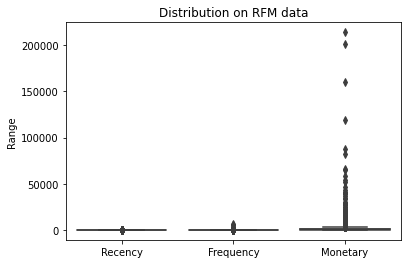

In [79]:
attributes = ["Recency","Frequency","Monetary"]
sns.boxplot(data = rfm[attributes])
plt.title("Distribution on RFM data")
plt.ylabel("Range")
plt.show()

In [81]:
# Removing Outliers
q1 = rfm["Recency"].quantile(0.05)
q3 = rfm["Recency"].quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Recency >= q1-1.5*iqr)&(rfm.Recency <= q3+1.5*iqr)]

q1 = rfm["Frequency"].quantile(0.05)
q3 = rfm["Frequency"].quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Frequency >= q1-1.5*iqr)&(rfm.Frequency <= q3+1.5*iqr)]

q1 = rfm["Monetary"].quantile(0.05)
q3 = rfm["Monetary"].quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Monetary >= q1-1.5*iqr)&(rfm.Monetary <= q3+1.5*iqr)]
rfm

,CustomerID,Recency,Frequency,Monetary
0,12347.0,1,122,3122.82
1,12348.0,74,8,677.00
2,12349.0,17,73,1757.55
3,12352.0,35,47,944.23
4,12353.0,203,4,89.00
...,...,...,...,...
3842,18277.0,57,8,110.38
3843,18278.0,72,9,173.90
3844,18281.0,179,7,80.82
3845,18282.0,6,12,178.05


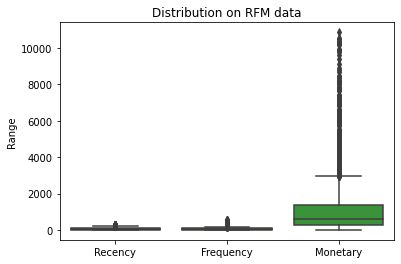

In [83]:
attributes = ["Recency","Frequency","Monetary"]
sns.boxplot(data = rfm[attributes])
plt.title("Distribution on RFM data")
plt.ylabel("Range")
plt.show()

In [111]:
rfm['r_percentile'] = rfm['Recency'].rank(pct=True,ascending=False)
rfm['r_score'] = pd.qcut(rfm['r_percentile'], 5, labels=range(1,6))

rfm['f_percentile'] = rfm['Frequency'].rank(pct=True,ascending=True)
rfm['f_score'] = pd.qcut(rfm['f_percentile'], 5, labels=range(5,0,-1))

rfm['m_percentile'] = rfm['Monetary'].rank(pct=True,ascending=True)
rfm['m_score'] = pd.qcut(rfm['m_percentile'], 5, labels=range(5,0,-1))
rfm

,CustomerID,Recency,Frequency,Monetary,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score,RFM
0,12347.0,1,122,3122.82,0.965861,5,0.847635,1,0.922954,1,111
1,12348.0,74,8,677.00,0.307120,2,0.113310,5,0.536663,3,453
2,12349.0,17,73,1757.55,0.722503,4,0.717322,2,0.814559,1,221
3,12352.0,35,47,944.23,0.534405,3,0.578507,3,0.640276,2,332
4,12353.0,203,4,89.00,0.062832,1,0.049681,5,0.028959,5,555
...,...,...,...,...,...,...,...,...,...,...,...
3842,18277.0,57,8,110.38,0.400770,2,0.113310,5,0.049150,5,455
3843,18278.0,72,9,173.90,0.318943,2,0.130712,5,0.132837,5,455
3844,18281.0,179,7,80.82,0.098300,1,0.097635,5,0.024973,5,555
3845,18282.0,6,12,178.05,0.886955,5,0.184910,5,0.137620,5,155


In [112]:
rfm['RFM'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm

,CustomerID,Recency,Frequency,Monetary,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score,RFM
0,12347.0,1,122,3122.82,0.965861,5,0.847635,1,0.922954,1,511
1,12348.0,74,8,677.00,0.307120,2,0.113310,5,0.536663,3,253
2,12349.0,17,73,1757.55,0.722503,4,0.717322,2,0.814559,1,421
3,12352.0,35,47,944.23,0.534405,3,0.578507,3,0.640276,2,332
4,12353.0,203,4,89.00,0.062832,1,0.049681,5,0.028959,5,155
...,...,...,...,...,...,...,...,...,...,...,...
3842,18277.0,57,8,110.38,0.400770,2,0.113310,5,0.049150,5,255
3843,18278.0,72,9,173.90,0.318943,2,0.130712,5,0.132837,5,255
3844,18281.0,179,7,80.82,0.098300,1,0.097635,5,0.024973,5,155
3845,18282.0,6,12,178.05,0.886955,5,0.184910,5,0.137620,5,555


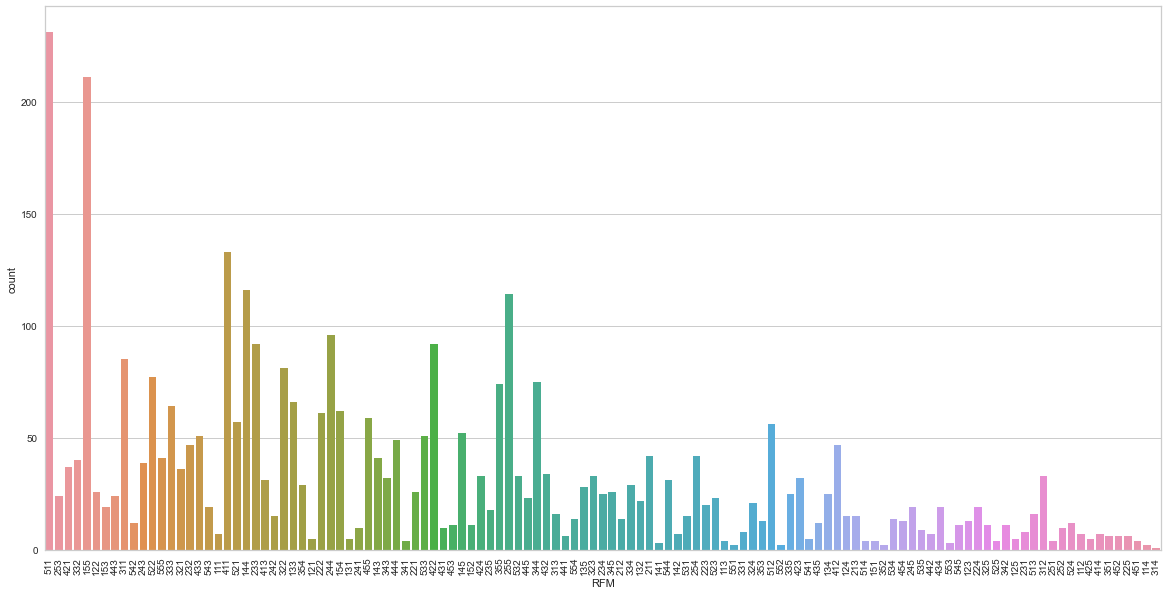

In [113]:
plt.figure(figsize=(20,10))
sns.countplot(data=rfm,x="RFM",orient='v')
plt.xticks(rotation=90)
plt.show()

### 4. Use the elbow method to identify how many customer segments exist, using the RFMvalues for each customer.

In [114]:
tran = pd.DataFrame([rfm.r_score, rfm.f_score, rfm.m_score]).transpose()
tran

,r_score,f_score,m_score
0,5,1,1
1,2,5,3
2,4,2,1
3,3,3,2
4,1,5,5
...,...,...,...
3842,2,5,5
3843,2,5,5
3844,1,5,5
3845,5,5,5


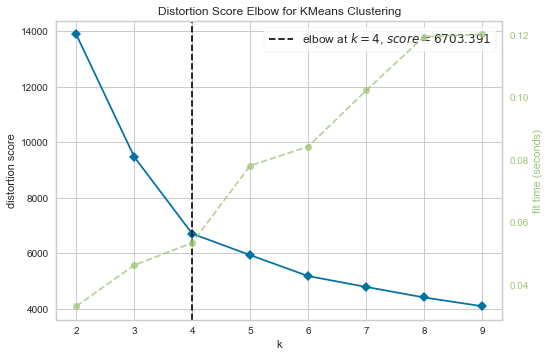

In [132]:
from sklearn.cluster import KMeans

wcss =[]

for i in range(2,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3764,n_init=10,random_state=101)
  kmeans.fit_predict(tran)
  wcss.append(kmeans.inertia_)

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(tran)
visu.show();

Hence Number of clusters is 4

### 5. Create the customer segments with K-means algorithm by using number of clusters is suggested by elbow method.

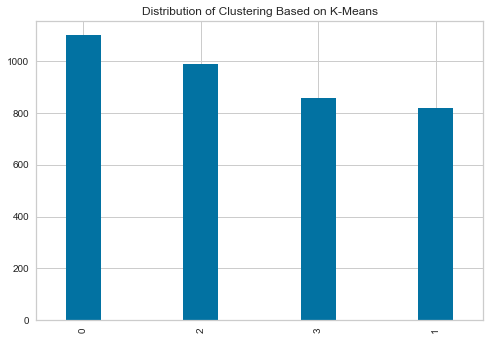

In [133]:
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=3764, random_state=101 )
y_kmeans = kmeans.fit_predict(tran);

centers=kmeans.cluster_centers_

tran['Kmeans_Label_ID']=y_kmeans
tran.Kmeans_Label_ID.value_counts().plot.bar(width=0.3)
plt.title('Distribution of Clustering Based on K-Means');

### 6. Plot the clusters in a scatter plot and mark each segment differently using lmplot.

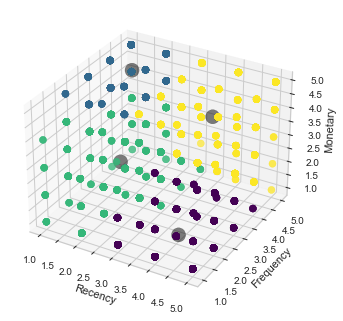

In [134]:
ax = plt.axes(projection ="3d")
ax.scatter3D(tran['r_score'], t  ran['f_score'],tran['m_score'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter3D(centers[:,0], centers[:,1], centers[:,2], c='black', s=200, alpha=0.5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

### 7. Print the cluster centers of each customer segment and explain them intuitively.

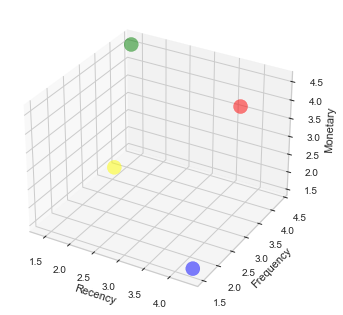

In [135]:
ax = plt.axes(projection ="3d")
centers = kmeans.cluster_centers_
col = ["blue","green","yellow","red"]
ax.scatter3D(centers[:,0], centers[:,1], centers[:,2], c=col, s=200, alpha=0.5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

Cluster Blue: This cluster contains people with low purchasing power but high recency(buy regularly)<br>
Cluster Green: This cluster contains people with high purchasing power but low recency<br>
Cluster red: This cluster contains people with good purchasing power as well as recency<br>
Cluster yellow: This cluster contains people with low purchasing power and low recency but high frequency i.e; they buy a lot of low price items at once

### 8. Create the customer segments with Agglomerative algorithm by using number of clusters is suggested by elbow method.

Text(0.5, 1.0, 'Distribution of Agglomerative Clustering')

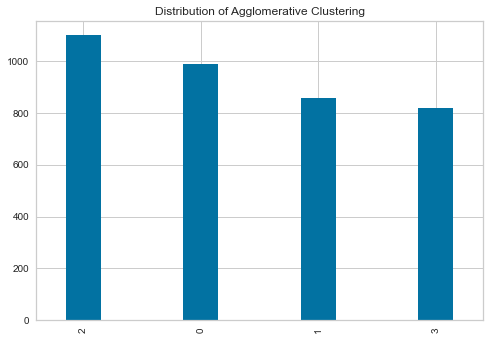

In [136]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 4)
y_ac=ac.fit_predict(tran)

tran['AC_Label_ID']=y_ac
tran['AC_Label_ID'].value_counts().plot.bar(width=0.3)
plt.title('Distribution of Agglomerative Clustering')

In [138]:
dend = tran[["r_score","f_score","m_score"]]
dend

,r_score,f_score,m_score
0,5,1,1
1,2,5,3
2,4,2,1
3,3,3,2
4,1,5,5
...,...,...,...
3842,2,5,5
3843,2,5,5
3844,1,5,5
3845,5,5,5


### 9. Visualize the clusters using the dendrogram.

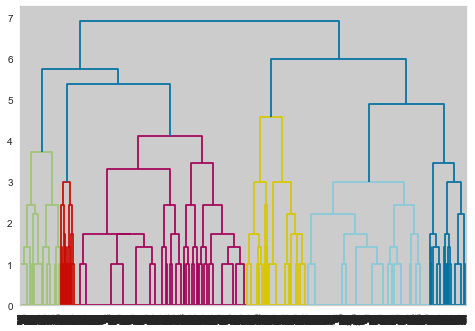

In [139]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dend, method='complete'))

### 10. Compare the clusters obtained using KMeans vs. Agglomeration.

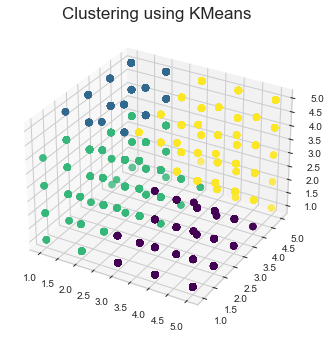

In [147]:
ax = plt.axes(projection ="3d")
ax.scatter3D(tran['r_score'], tran['f_score'],tran['m_score'], c=y_kmeans, s=50, cmap='viridis')
plt.title("Clustering using KMeans",fontsize=17)
plt.show()

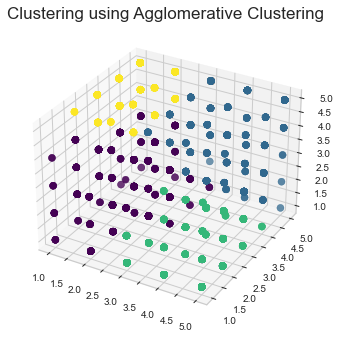

In [148]:
ax = plt.axes(projection ="3d")
ax.scatter3D(tran['r_score'], tran['f_score'],tran['m_score'], c=y_ac, s=50, cmap='viridis')
plt.title("Clustering using Agglomerative Clustering",fontsize=17)
plt.show()